In [16]:
import pandas as pd
import missingno as msno
import re
from Brief_Scraping_Allocine import methods

best_movies = pd.read_csv("best_movies.csv", sep=",")

In [13]:
best_movies

,title,release_date,target_audience,length,rating,synopsis,genres,staring,original_language,original_country,original_title
0,Les Évadés,"March 1, 1995 (France)",Tous publics,142,9.3,Two imprisoned men bond over a number of years...,Drama,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",English,United States,The Shawshank Redemption
1,Le Roi Lion,"November 9, 1994 (France)",Tous publics,88,8.5,Lion prince Simba and his father are targeted ...,"Animation,Adventure,Drama","Matthew Broderick,Jeremy Irons,James Earl Jone...",English,United States,The Lion King
2,Les temps modernes,"March 13, 1936 (France)",Tous publics,87,8.5,The Tramp struggles to live in modern industri...,"Comedy,Drama,Family","Charles Chaplin,Paulette Goddard,Henry Bergman...",English,United States,Modern Times
3,Le tombeau des lucioles,"June 19, 1996 (France)",Tous publics,89,8.5,A young boy and his little sister struggle to ...,"Animation,Drama,War","Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguch...",Japanese,Japan,Hotaru no haka
4,Gladiator,"June 20, 2000 (France)",Tous publics avec avertissement,155,8.5,A former Roman General sets out to exact venge...,"Action,Adventure,Drama","Russell Crowe,Joaquin Phoenix,Connie Nielsen,O...",English,United States,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245,Pulp Fiction,"October 26, 1994 (France)",12,154,8.9,"The lives of two mob hitmen, a boxer, a gangst...","Crime,Drama","John Travolta,Uma Thurman,Samuel L. Jackson,Br...",English,United States,NaN
246,Le Parrain,"October 18, 1972 (France)",12,175,9.2,The Godfather follows Vito Corleone Don of the...,"Crime,Drama","Marlon Brando,Al Pacino,James Caan,Diane Keato...",English,United States,The Godfather
247,"Le Parrain, 2ᵉ partie","August 27, 1975 (France)",13,202,9.0,The early life and career of Vito Corleone in ...,"Crime,Drama","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",English,United States,The Godfather: Part II
248,The Dark Knight : Le Chevalier noir,"August 13, 2008 (France)",Tous publics,152,9.0,When the menace known as the Joker wreaks havo...,"Action,Crime,Drama","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",English,United States,The Dark Knight


<AxesSubplot:>

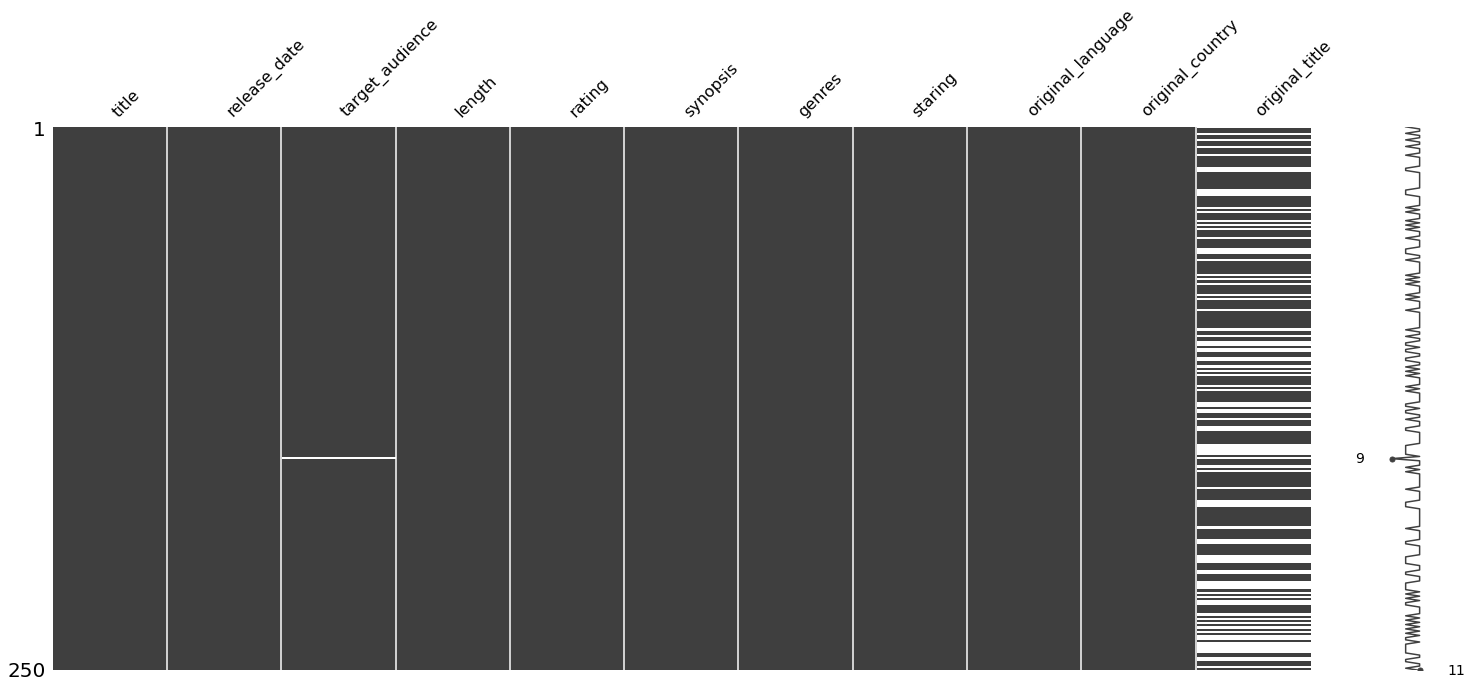

In [4]:
%matplotlib inline
msno.matrix(best_movies.sample(250))

Répondre aux questions suivantes :
1) Quel est le film le plus long ?
2) Quels sont les 5 films les mieux notés ?
3) Dans combien de films a joué Morgan Freeman ? Tom Cruise ?
4) Quels sont les 3 meilleurs films d’horreur ? Dramatique ? Comique ?
5) Parmi les 100 films les mieux notés, quel pourcentage sont américains ? Français ?
6) Quel est la durée moyenne d’un film en fonction du genre ?

In [18]:
#turning ratings from string to float type
best_movies.rating.apply(lambda x:float(x))
# best_movies.release_date.apply(lambda x:methods.down_with_france(x))

best_movies.release_date

0          March 1, 1995 (France)
1       November 9, 1994 (France)
2         March 13, 1936 (France)
3          June 19, 1996 (France)
4          June 20, 2000 (France)
                  ...            
245     October 26, 1994 (France)
246     October 18, 1972 (France)
247      August 27, 1975 (France)
248      August 13, 2008 (France)
249    December 17, 2003 (France)
Name: release_date, Length: 250, dtype: object

In [33]:
id = best_movies['rating'].idxmax()
best_movies.title

SyntaxError: invalid syntax (Temp/ipykernel_1528/3478654268.py, line 2)

In [49]:
best_movies['release_year'] = best_movies['release_date'].str.extract(r', (\d+)')
best_movies['release_year'] = best_movies['release_year'].astype('float', errors='ignore')


In [50]:
best_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              250 non-null    object 
 1   release_date       250 non-null    object 
 2   target_audience    249 non-null    object 
 3   length             250 non-null    int64  
 4   rating             250 non-null    float64
 5   synopsis           250 non-null    object 
 6   genres             250 non-null    object 
 7   staring            250 non-null    object 
 8   original_language  250 non-null    object 
 9   original_country   250 non-null    object 
 10  original_title     160 non-null    object 
 11  release_year       249 non-null    float64
dtypes: float64(2), int64(1), object(9)
memory usage: 23.6+ KB


In [52]:
mask = best_movies['release_year'] < 2000
best_movies[mask]

,title,release_date,target_audience,length,rating,synopsis,genres,staring,original_language,original_country,original_title,release_year
0,Les Évadés,"March 1, 1995 (France)",Tous publics,142,9.3,Two imprisoned men bond over a number of years...,Drama,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",English,United States,The Shawshank Redemption,1995.0
1,Le Roi Lion,"November 9, 1994 (France)",Tous publics,88,8.5,Lion prince Simba and his father are targeted ...,"Animation,Adventure,Drama","Matthew Broderick,Jeremy Irons,James Earl Jone...",English,United States,The Lion King,1994.0
2,Les temps modernes,"March 13, 1936 (France)",Tous publics,87,8.5,The Tramp struggles to live in modern industri...,"Comedy,Drama,Family","Charles Chaplin,Paulette Goddard,Henry Bergman...",English,United States,Modern Times,1936.0
3,Le tombeau des lucioles,"June 19, 1996 (France)",Tous publics,89,8.5,A young boy and his little sister struggle to ...,"Animation,Drama,War","Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguch...",Japanese,Japan,Hotaru no haka,1996.0
5,Les lumières de la ville,"April 7, 1931 (France)",Tous publics,87,8.5,"With the aid of a wealthy erratic tippler, a d...","Comedy,Drama,Romance","Charles Chaplin,Virginia Cherrill,Florence Lee...",None,United States,City Lights,1931.0
...,...,...,...,...,...,...,...,...,...,...,...,...
243,12 Hommes en colère,"September 4, 1957 (France)",Tous publics,96,9.0,The jury in a New York City murder trial is fr...,"Crime,Drama","Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",English,United States,12 Angry Men,1957.0
244,La liste de Schindler,"March 2, 1994 (France)",Tous publics,195,8.9,"In German-occupied Poland during World War II,...","Biography,Drama,History","Liam Neeson,Ralph Fiennes,Ben Kingsley,Carolin...",English,United States,Schindler's List,1994.0
245,Pulp Fiction,"October 26, 1994 (France)",12,154,8.9,"The lives of two mob hitmen, a boxer, a gangst...","Crime,Drama","John Travolta,Uma Thurman,Samuel L. Jackson,Br...",English,United States,NaN,1994.0
246,Le Parrain,"October 18, 1972 (France)",12,175,9.2,The Godfather follows Vito Corleone Don of the...,"Crime,Drama","Marlon Brando,Al Pacino,James Caan,Diane Keato...",English,United States,The Godfather,1972.0


In [55]:
mask = best_movies['genres'].str.contains('Drama')
best_movies[mask]

,title,release_date,target_audience,length,rating,synopsis,genres,staring,original_language,original_country,original_title,release_year
0,Les Évadés,"March 1, 1995 (France)",Tous publics,142,9.3,Two imprisoned men bond over a number of years...,Drama,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",English,United States,The Shawshank Redemption,1995.0
1,Le Roi Lion,"November 9, 1994 (France)",Tous publics,88,8.5,Lion prince Simba and his father are targeted ...,"Animation,Adventure,Drama","Matthew Broderick,Jeremy Irons,James Earl Jone...",English,United States,The Lion King,1994.0
2,Les temps modernes,"March 13, 1936 (France)",Tous publics,87,8.5,The Tramp struggles to live in modern industri...,"Comedy,Drama,Family","Charles Chaplin,Paulette Goddard,Henry Bergman...",English,United States,Modern Times,1936.0
3,Le tombeau des lucioles,"June 19, 1996 (France)",Tous publics,89,8.5,A young boy and his little sister struggle to ...,"Animation,Drama,War","Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguch...",Japanese,Japan,Hotaru no haka,1996.0
4,Gladiator,"June 20, 2000 (France)",Tous publics avec avertissement,155,8.5,A former Roman General sets out to exact venge...,"Action,Adventure,Drama","Russell Crowe,Joaquin Phoenix,Connie Nielsen,O...",English,United States,NaN,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
245,Pulp Fiction,"October 26, 1994 (France)",12,154,8.9,"The lives of two mob hitmen, a boxer, a gangst...","Crime,Drama","John Travolta,Uma Thurman,Samuel L. Jackson,Br...",English,United States,NaN,1994.0
246,Le Parrain,"October 18, 1972 (France)",12,175,9.2,The Godfather follows Vito Corleone Don of the...,"Crime,Drama","Marlon Brando,Al Pacino,James Caan,Diane Keato...",English,United States,The Godfather,1972.0
247,"Le Parrain, 2ᵉ partie","August 27, 1975 (France)",13,202,9.0,The early life and career of Vito Corleone in ...,"Crime,Drama","Al Pacino,Robert De Niro,Robert Duvall,Diane K...",English,United States,The Godfather: Part II,1975.0
248,The Dark Knight : Le Chevalier noir,"August 13, 2008 (France)",Tous publics,152,9.0,When the menace known as the Joker wreaks havo...,"Action,Crime,Drama","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",English,United States,The Dark Knight,2008.0


In [97]:
# Longest movie

best_movies.sort_values('length', ascending=False).head(1)

,title,release_date,target_audience,length,rating,synopsis,genres,staring,original_language,original_country,original_title,release_year
42,Gangs of Wasseypur,"June 22, 2012 (India)",Tous publics avec avertissement,321,8.2,A clash between Sultan and Shahid Khan leads t...,"Action,Comedy,Crime","Manoj Bajpayee,Richa Chadha,Nawazuddin Siddiqu...",Hindi,India,NaN,2012.0


In [96]:
# Top 5 highest rated movies

best_movies.sort_values('rating', ascending=False).head(5)

,title,release_date,target_audience,length,rating,synopsis,genres,staring,original_language,original_country,original_title,release_year
158,Jai Bhim,"November 1, 2021 (France)",NaN,0,9.5,When a tribal man is arrested for a case of al...,"Crime,Drama","Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijaya...",Tamil,India,NaN,2021.0
0,Les Évadés,"March 1, 1995 (France)",Tous publics,142,9.3,Two imprisoned men bond over a number of years...,Drama,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",English,United States,The Shawshank Redemption,1995.0
246,Le Parrain,"October 18, 1972 (France)",12,175,9.2,The Godfather follows Vito Corleone Don of the...,"Crime,Drama","Marlon Brando,Al Pacino,James Caan,Diane Keato...",English,United States,The Godfather,1972.0
17,Soorarai Pottru,"November 11, 2020 (France)",18,153,9.1,"Nedumaaran Rajangam ""Maara"" sets out to make t...",Drama,"Suriya,Paresh Rawal,Aparna Balamurali,Gaurav P...",Tamil,India,NaN,2020.0
248,The Dark Knight : Le Chevalier noir,"August 13, 2008 (France)",Tous publics,152,9.0,When the menace known as the Joker wreaks havo...,"Action,Crime,Drama","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",English,United States,The Dark Knight,2008.0


In [71]:
# How many movies in the top 250 is Morgan Freeman stared
mask = best_movies['staring'].str.contains('Morgan Freeman')
best_movies[mask].count()['title']

7

In [70]:
# How many movies in the top 250 is Tom Cruise stared

mask = best_movies['staring'].str.contains('Tom Cruise')
best_movies[mask].count()['title']


0

In [105]:
# Les 3 meilleurs films d'horreur
horror_movies = best_movies['genres'].str.contains('Horror')
best_movies[horror_movies].sort_values('rating',ascending=False).head(3)

,title,release_date,target_audience,length,rating,synopsis,genres,staring,original_language,original_country,original_title,release_year
8,Psychose,"November 2, 1960 (France)",18,109,8.5,"A Phoenix secretary embezzles $40,000 from her...","Horror,Mystery,Thriller","Anthony Perkins,Janet Leigh,Vera Miles,John Ga...",English,United States,Psycho,1960.0
200,Shining,"October 16, 1980 (France)",12,146,8.4,A family heads to an isolated hotel for the wi...,"Drama,Horror","Jack Nicholson,Shelley Duvall,Danny Lloyd,Scat...",English,United Kingdom,The Shining,1980.0
212,Alien - Le 8ème passager,"September 12, 1979 (France)",12,117,8.4,After a space merchant vessel receives an unkn...,"Horror,Sci-Fi","Sigourney Weaver,Tom Skerritt,John Hurt,Veroni...",English,United Kingdom,Alien,1979.0


In [94]:
top_hundred = best_movies.sort_values('rating', ascending=False).head(100)

# Percentage of american movies in top 100
american_in_top = top_hundred['original_country'].str.contains('United States')
print(str(top_hundred[american_in_top].count()['title']) + '%')

# Percentage of french movies in top 100
french_in_top = top_hundred['original_country'].str.contains('France')
print(str(top_hundred[french_in_top].count()['title']) + '%')


52%
3%


In [112]:
# Average length of comedy movies

comedy_movies = best_movies['genres'].str.contains('Comedy')
best_movies[comedy_movies]['length'].describe()['50%']

103.5